<a href="https://colab.research.google.com/github/SecretServicess/FirstRepo/blob/master/DQD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec as w2v

In [ ]:
#Downloading Required Nltk Files
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/train.csv")
pd.options.display.max_colwidth = 200
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404284,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexuality?,1
404285,404285,433578,379845,How many keywords are there in the Racket programming language of the latest version?,How many keywords are there in PERL Programming Language in the latest version?,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0


In [ ]:
list(df["is_duplicate"].value_counts())

[255026, 149263]

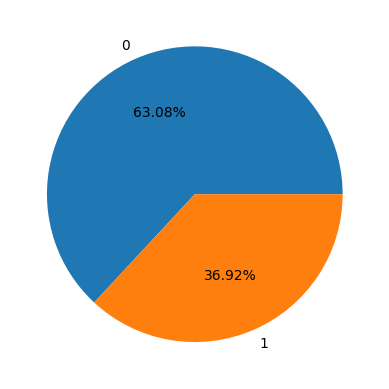

In [ ]:
#Visializing Classes
plt.pie(list(df["is_duplicate"].value_counts()), labels = [0,1], autopct='%1.2f%%')
plt.show()

In [ ]:
df['question1'] = df['question1'].str.lower()
df['question2'] = df['question2'].str.lower()
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in share market in india?,what is the step by step guide to invest in share market?,0
1,1,3,4,what is the story of kohinoor (koh-i-noor) diamond?,what would happen if the indian government stole the kohinoor (koh-i-noor) diamond back?,0
2,2,5,6,how can i increase the speed of my internet connection while using a vpn?,how can internet speed be increased by hacking through dns?,0
3,3,7,8,why am i mentally very lonely? how can i solve it?,"find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",which fish would survive in salt water?,0


In [ ]:
df["question1"] = df['question1'].str.replace('[^A-Z a-z 0-9]','') #removing punctuations
df["question2"] = df['question2'].str.replace('[^A-Z a-z 0-9]','')
df

<ipython-input-11-b6a01d24aba2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["question1"] = df['question1'].str.replace('[^A-Z a-z 0-9]','') #removing punctuations
<ipython-input-11-b6a01d24aba2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["question2"] = df['question2'].str.replace('[^A-Z a-z 0-9]','')


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government stole the kohinoor kohinoor diamond back,0
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divided by 2423,0
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0
...,...,...,...,...,...,...
404284,404284,537926,537927,what does jainism say about homosexuality,what does jainism say about gays and homosexuality,1
404285,404285,433578,379845,how many keywords are there in the racket programming language of the latest version,how many keywords are there in perl programming language in the latest version,0
404286,404286,18840,155606,do you believe there is life after death,is it true that there is life after death,1
404287,404287,537928,537929,what is one coin,whats this coin,0


In [ ]:
df = df.dropna()

In [ ]:
df["question1"] = df['question1'].apply(word_tokenize)
df["question2"] = df['question2'].apply(word_tokenize)
df

<ipython-input-13-6e27ad79ed50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["question1"] = df['question1'].apply(word_tokenize)
<ipython-input-13-6e27ad79ed50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["question2"] = df['question2'].apply(word_tokenize)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,"[what, is, the, step, by, step, guide, to, invest, in, share, market, in, india]","[what, is, the, step, by, step, guide, to, invest, in, share, market]",0
1,1,3,4,"[what, is, the, story, of, kohinoor, kohinoor, diamond]","[what, would, happen, if, the, indian, government, stole, the, kohinoor, kohinoor, diamond, back]",0
2,2,5,6,"[how, can, i, increase, the, speed, of, my, internet, connection, while, using, a, vpn]","[how, can, internet, speed, be, increased, by, hacking, through, dns]",0
3,3,7,8,"[why, am, i, mentally, very, lonely, how, can, i, solve, it]","[find, the, remainder, when, math2324math, is, divided, by, 2423]",0
4,4,9,10,"[which, one, dissolve, in, water, quikly, sugar, salt, methane, and, carbon, di, oxide]","[which, fish, would, survive, in, salt, water]",0
...,...,...,...,...,...,...
404284,404284,537926,537927,"[what, does, jainism, say, about, homosexuality]","[what, does, jainism, say, about, gays, and, homosexuality]",1
404285,404285,433578,379845,"[how, many, keywords, are, there, in, the, racket, programming, language, of, the, latest, version]","[how, many, keywords, are, there, in, perl, programming, language, in, the, latest, version]",0
404286,404286,18840,155606,"[do, you, believe, there, is, life, after, death]","[is, it, true, that, there, is, life, after, death]",1
404287,404287,537928,537929,"[what, is, one, coin]","[whats, this, coin]",0


In [ ]:
#Creating all the functions to do Pre-Processing
en_stopwords = stopwords.words('english')
def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:   
            result.append(token)
    return result

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()    
    result=[]
    for word in text:
        result.append(lemmatizer.lemmatize(word))
    return result

def stemming(text):
    snow = SnowballStemmer(language='english')
    result=[]
    for word in text:
        result.append(snow.stem(word))
    return result

In [ ]:
df["question1"] = df['question1'].apply(remove_stopwords)
df["question2"] = df['question2'].apply(remove_stopwords)
df

<ipython-input-15-2360b8f72704>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["question1"] = df['question1'].apply(remove_stopwords)
<ipython-input-15-2360b8f72704>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["question2"] = df['question2'].apply(remove_stopwords)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]",0
1,1,3,4,"[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, stole, kohinoor, kohinoor, diamond, back]",0
2,2,5,6,"[increase, speed, internet, connection, using, vpn]","[internet, speed, increased, hacking, dns]",0
3,3,7,8,"[mentally, lonely, solve]","[find, remainder, math2324math, divided, 2423]",0
4,4,9,10,"[one, dissolve, water, quikly, sugar, salt, methane, carbon, di, oxide]","[fish, would, survive, salt, water]",0
...,...,...,...,...,...,...
404284,404284,537926,537927,"[jainism, say, homosexuality]","[jainism, say, gays, homosexuality]",1
404285,404285,433578,379845,"[many, keywords, racket, programming, language, latest, version]","[many, keywords, perl, programming, language, latest, version]",0
404286,404286,18840,155606,"[believe, life, death]","[true, life, death]",1
404287,404287,537928,537929,"[one, coin]","[whats, coin]",0


In [ ]:
df["question1"] = df['question1'].apply(lemmatizing)
df["question2"] = df['question2'].apply(lemmatizing)
df

<ipython-input-16-562a1aca8fe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["question1"] = df['question1'].apply(lemmatizing)
<ipython-input-16-562a1aca8fe7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["question2"] = df['question2'].apply(lemmatizing)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]",0
1,1,3,4,"[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, stole, kohinoor, kohinoor, diamond, back]",0
2,2,5,6,"[increase, speed, internet, connection, using, vpn]","[internet, speed, increased, hacking, dns]",0
3,3,7,8,"[mentally, lonely, solve]","[find, remainder, math2324math, divided, 2423]",0
4,4,9,10,"[one, dissolve, water, quikly, sugar, salt, methane, carbon, di, oxide]","[fish, would, survive, salt, water]",0
...,...,...,...,...,...,...
404284,404284,537926,537927,"[jainism, say, homosexuality]","[jainism, say, gay, homosexuality]",1
404285,404285,433578,379845,"[many, keywords, racket, programming, language, latest, version]","[many, keywords, perl, programming, language, latest, version]",0
404286,404286,18840,155606,"[believe, life, death]","[true, life, death]",1
404287,404287,537928,537929,"[one, coin]","[whats, coin]",0


In [ ]:
df["question1"] = df['question1'].apply(stemming)
df["question2"] = df['question2'].apply(stemming)
df

<ipython-input-17-db2355705048>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["question1"] = df['question1'].apply(stemming)
<ipython-input-17-db2355705048>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["question2"] = df['question2'].apply(stemming)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",0
1,1,3,4,"[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoor, kohinoor, diamond, back]",0
2,2,5,6,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dns]",0
3,3,7,8,"[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]",0
4,4,9,10,"[one, dissolv, water, quik, sugar, salt, methan, carbon, di, oxid]","[fish, would, surviv, salt, water]",0
...,...,...,...,...,...,...
404284,404284,537926,537927,"[jainism, say, homosexu]","[jainism, say, gay, homosexu]",1
404285,404285,433578,379845,"[mani, keyword, racket, program, languag, latest, version]","[mani, keyword, perl, program, languag, latest, version]",0
404286,404286,18840,155606,"[believ, life, death]","[true, life, death]",1
404287,404287,537928,537929,"[one, coin]","[what, coin]",0


In [ ]:
doc = (df["question1"].tolist())
for i in df["question2"].tolist():
    doc.append(i)

In [ ]:
#Creating Word2Vec model with Min_Count=2
model = w2v(doc, min_count=2, vector_size=50)

In [ ]:
model.wv.most_similar("program")

[('c', 0.7789974212646484),
 ('programm', 0.7489533424377441),
 ('java', 0.6706668138504028),
 ('code', 0.637078046798706),
 ('comput', 0.636060893535614),
 ('haskel', 0.6115400791168213),
 ('python', 0.602774977684021),
 ('master', 0.5844244956970215),
 ('softwar', 0.583662211894989),
 ('cours', 0.5783764719963074)]

In [ ]:
model.wv.similarity("program","fun")

0.042971984

In [ ]:
def sen_vec(text):
    result = np.zeros(50)
    for i in range(len(text)):
        if text[i] in model.wv.index_to_key:
            result += np.array(model.wv[text[i]])
    return result

In [ ]:
df = df.dropna()

In [ ]:
df["question1_embed"] = df['question1'].apply(sen_vec)
df["question2_embed"] = df['question2'].apply(sen_vec)
df

,id,qid1,qid2,question1,question2,is_duplicate,question1_embed,question2_embed
0,0,1,2,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",0,"[4.96750370549853, 1.821115493774414, -5.113733291625977, 9.743583798408508, 2.7746964134275913, -9.046032510697842, 0.42349374294281006, -1.5477256383746862, -3.6065633073449135, -0.2085198163986...","[4.55949217962916, 1.3520188331604004, -4.55560439825058, 8.36691701412201, 1.605741921812296, -7.1068923100829124, 1.1130039691925049, -0.9302029814571142, -0.9491286054253578, 0.868022084236145,..."
1,1,3,4,"[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoor, kohinoor, diamond, back]",0,"[0.524509847164154, 0.3887230157852173, 2.25175017118454, -2.003790784627199, 1.4971567690372467, -0.7661980763077736, -0.6411143615841866, -0.19087040424346924, -1.6006565392017365, 0.55897893011...","[-1.6717476230114698, 8.865324884653091, -2.889794036746025, 9.202509503811598, 10.079634577035904, 0.02675580233335495, -4.76131109893322, -2.646034609526396, -8.69979905989021, -0.92332644760608..."
2,2,5,6,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dns]",0,"[-4.772990345954895, -1.4196266401559114, 1.3848573863506317, 9.144853830337524, 8.656831949949265, -0.33901844918727875, -3.68382428586483, 5.9628925286233425, -3.9891467094421387, 3.007092636078...","[-5.284907415509224, 0.7876604720950127, 1.0788760855793953, 4.6662687510252, 6.442926086485386, 0.34025387465953827, -0.07479196786880493, 2.241440236568451, -4.636453092098236, 1.325773637741804..."
3,3,7,8,"[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]",0,"[-1.3678097911179066, -1.5722113400697708, 0.5018638372421265, 0.4271060526371002, -0.23839140683412552, 0.18553310632705688, 2.7947885990142822, -3.808903694152832, -3.055048882961273, 5.15349204...","[1.8474023640155792, 2.7935036420822144, 1.2207942456007004, 3.200545370578766, 5.996845364570618, -1.0048677921295166, 0.6228740513324738, -1.082460731267929, 1.0546269305050373, 4.45696622133255..."
4,4,9,10,"[one, dissolv, water, quik, sugar, salt, methan, carbon, di, oxid]","[fish, would, surviv, salt, water]",0,"[-11.794354800134897, 0.379695113748312, -2.3949998626776505, 3.4438768289983273, 5.571676969528198, -3.074291743338108, 4.904728747904301, 0.09233120828866959, -8.400643154978752, -9.949085295200...","[-10.43212977051735, 2.0569427609443665, -5.923021614551544, 5.614548146724701, 1.093144714832306, 1.8280690908432007, 1.0463433861732483, -4.62071904912591, -8.83972442150116, -9.979700088500977,..."
...,...,...,...,...,...,...,...,...
404284,404284,537926,537927,"[jainism, say, homosexu]","[jainism, say, gay, homosexu]",1,"[-0.10264337062835693, -1.4058824628591537, -0.5944839268922806, -1.39901964366436, 2.5760982781648636, -0.38107044249773026, 0.23334568738937378, 0.13259856402873993, -1.8959519565105438, 3.73278...","[0.2616088092327118, -2.1473989337682724, 0.23215924203395844, -2.990855023264885, 2.5198260620236397, -0.17103102058172226, 2.1633158326148987, 0.6189486235380173, -2.7317090928554535, 4.85460674..."
404285,404285,433578,379845,"[mani, keyword, racket, program, languag, latest, version]","[mani, keyword, perl, program, languag, latest, version]",0,"[0.8785847648978233, -2.9930933862924576, -10.59189597889781, 7.964805340394378, 0.8703272491693497, -6.969278480857611, 4.274805873632431, 6.616915553808212, -5.80055396258831, 7.126298755407333,...","[0.8982650339603424, -2.9828244522213936, -10.694367110729218, 8.23184323310852, 0.9947854951024055, -6.673741515725851, 4.347681879997253, 6.16216853260994, -6.1293844655156136, 7.730450555682182..."
404286,404286,18840,155606,"[believ, life, death]","[true, life, death]",1,"[-2.644951730966568, -1.928229570388794, -0.1067388653755188, -1.5405730828642845, -1.3559104204177856, 4.184422254562378, 0.8103494942188263, -5.824426472187042, -4.051952600479126, -1.7413465380...","[-0.8098542094230

In [ ]:
df['cosine_sim'] = df[['question1_embed','question2_embed']].apply(lambda x: cosine_similarity([x[0]],[x[1]])[0][0], axis=1)
df

,id,qid1,qid2,question1,question2,is_duplicate,question1_embed,question2_embed,cosine_sim
0,0,1,2,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",0,"[4.96750370549853, 1.821115493774414, -5.113733291625977, 9.743583798408508, 2.7746964134275913, -9.046032510697842, 0.42349374294281006, -1.5477256383746862, -3.6065633073449135, -0.2085198163986...","[4.55949217962916, 1.3520188331604004, -4.55560439825058, 8.36691701412201, 1.605741921812296, -7.1068923100829124, 1.1130039691925049, -0.9302029814571142, -0.9491286054253578, 0.868022084236145,...",0.978821
1,1,3,4,"[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoor, kohinoor, diamond, back]",0,"[0.524509847164154, 0.3887230157852173, 2.25175017118454, -2.003790784627199, 1.4971567690372467, -0.7661980763077736, -0.6411143615841866, -0.19087040424346924, -1.6006565392017365, 0.55897893011...","[-1.6717476230114698, 8.865324884653091, -2.889794036746025, 9.202509503811598, 10.079634577035904, 0.02675580233335495, -4.76131109893322, -2.646034609526396, -8.69979905989021, -0.92332644760608...",0.160110
2,2,5,6,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dns]",0,"[-4.772990345954895, -1.4196266401559114, 1.3848573863506317, 9.144853830337524, 8.656831949949265, -0.33901844918727875, -3.68382428586483, 5.9628925286233425, -3.9891467094421387, 3.007092636078...","[-5.284907415509224, 0.7876604720950127, 1.0788760855793953, 4.6662687510252, 6.442926086485386, 0.34025387465953827, -0.07479196786880493, 2.241440236568451, -4.636453092098236, 1.325773637741804...",0.892778
3,3,7,8,"[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]",0,"[-1.3678097911179066, -1.5722113400697708, 0.5018638372421265, 0.4271060526371002, -0.23839140683412552, 0.18553310632705688, 2.7947885990142822, -3.808903694152832, -3.055048882961273, 5.15349204...","[1.8474023640155792, 2.7935036420822144, 1.2207942456007004, 3.200545370578766, 5.996845364570618, -1.0048677921295166, 0.6228740513324738, -1.082460731267929, 1.0546269305050373, 4.45696622133255...",0.210309
4,4,9,10,"[one, dissolv, water, quik, sugar, salt, methan, carbon, di, oxid]","[fish, would, surviv, salt, water]",0,"[-11.794354800134897, 0.379695113748312, -2.3949998626776505, 3.4438768289983273, 5.571676969528198, -3.074291743338108, 4.904728747904301, 0.09233120828866959, -8.400643154978752, -9.949085295200...","[-10.43212977051735, 2.0569427609443665, -5.923021614551544, 5.614548146724701, 1.093144714832306, 1.8280690908432007, 1.0463433861732483, -4.62071904912591, -8.83972442150116, -9.979700088500977,...",0.796630
...,...,...,...,...,...,...,...,...,...
404284,404284,537926,537927,"[jainism, say, homosexu]","[jainism, say, gay, homosexu]",1,"[-0.10264337062835693, -1.4058824628591537, -0.5944839268922806, -1.39901964366436, 2.5760982781648636, -0.38107044249773026, 0.23334568738937378, 0.13259856402873993, -1.8959519565105438, 3.73278...","[0.2616088092327118, -2.1473989337682724, 0.23215924203395844, -2.990855023264885, 2.5198260620236397, -0.17103102058172226, 2.1633158326148987, 0.6189486235380173, -2.7317090928554535, 4.85460674...",0.943037
404285,404285,433578,379845,"[mani, keyword, racket, program, languag, latest, version]","[mani, keyword, perl, program, languag, latest, version]",0,"[0.8785847648978233, -2.9930933862924576, -10.59189597889781, 7.964805340394378, 0.8703272491693497, -6.969278480857611, 4.274805873632431, 6.616915553808212, -5.80055396258831, 7.126298755407333,...","[0.8982650339603424, -2.9828244522213936, -10.694367110729218, 8.23184323310852, 0.9947854951024055, -6.673741515725851, 4.347681879997253, 6.16216853260994, -6.1293844655156136, 7.730450555682182...",0.999231
404286,404286,18840,155606,"[believ, life, death]","[true, life, death]",1,"[-2.644951730966568, -1.928229570388794, -0.1067388653755188, -1.5405730828642845, -1.3559104204177856, 4.184422254562378, 0.8103494942188263

In [ ]:
df['jaccard_sim'] = df[['question1','question2']].apply(lambda x: (len(set(x[0]).intersection(set(x[1])))+1) / (len(set(x[0]).union(set(x[1])))+1), axis=1)
df 

,id,qid1,qid2,question1,question2,is_duplicate,question1_embed,question2_embed,cosine_sim,jaccard_sim
0,0,1,2,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",0,"[4.96750370549853, 1.821115493774414, -5.113733291625977, 9.743583798408508, 2.7746964134275913, -9.046032510697842, 0.42349374294281006, -1.5477256383746862, -3.6065633073449135, -0.2085198163986...","[4.55949217962916, 1.3520188331604004, -4.55560439825058, 8.36691701412201, 1.605741921812296, -7.1068923100829124, 1.1130039691925049, -0.9302029814571142, -0.9491286054253578, 0.868022084236145,...",0.978821,0.857143
1,1,3,4,"[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoor, kohinoor, diamond, back]",0,"[0.524509847164154, 0.3887230157852173, 2.25175017118454, -2.003790784627199, 1.4971567690372467, -0.7661980763077736, -0.6411143615841866, -0.19087040424346924, -1.6006565392017365, 0.55897893011...","[-1.6717476230114698, 8.865324884653091, -2.889794036746025, 9.202509503811598, 10.079634577035904, 0.02675580233335495, -4.76131109893322, -2.646034609526396, -8.69979905989021, -0.92332644760608...",0.160110,0.300000
2,2,5,6,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dns]",0,"[-4.772990345954895, -1.4196266401559114, 1.3848573863506317, 9.144853830337524, 8.656831949949265, -0.33901844918727875, -3.68382428586483, 5.9628925286233425, -3.9891467094421387, 3.007092636078...","[-5.284907415509224, 0.7876604720950127, 1.0788760855793953, 4.6662687510252, 6.442926086485386, 0.34025387465953827, -0.07479196786880493, 2.241440236568451, -4.636453092098236, 1.325773637741804...",0.892778,0.444444
3,3,7,8,"[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]",0,"[-1.3678097911179066, -1.5722113400697708, 0.5018638372421265, 0.4271060526371002, -0.23839140683412552, 0.18553310632705688, 2.7947885990142822, -3.808903694152832, -3.055048882961273, 5.15349204...","[1.8474023640155792, 2.7935036420822144, 1.2207942456007004, 3.200545370578766, 5.996845364570618, -1.0048677921295166, 0.6228740513324738, -1.082460731267929, 1.0546269305050373, 4.45696622133255...",0.210309,0.111111
4,4,9,10,"[one, dissolv, water, quik, sugar, salt, methan, carbon, di, oxid]","[fish, would, surviv, salt, water]",0,"[-11.794354800134897, 0.379695113748312, -2.3949998626776505, 3.4438768289983273, 5.571676969528198, -3.074291743338108, 4.904728747904301, 0.09233120828866959, -8.400643154978752, -9.949085295200...","[-10.43212977051735, 2.0569427609443665, -5.923021614551544, 5.614548146724701, 1.093144714832306, 1.8280690908432007, 1.0463433861732483, -4.62071904912591, -8.83972442150116, -9.979700088500977,...",0.796630,0.214286
...,...,...,...,...,...,...,...,...,...,...
404284,404284,537926,537927,"[jainism, say, homosexu]","[jainism, say, gay, homosexu]",1,"[-0.10264337062835693, -1.4058824628591537, -0.5944839268922806, -1.39901964366436, 2.5760982781648636, -0.38107044249773026, 0.23334568738937378, 0.13259856402873993, -1.8959519565105438, 3.73278...","[0.2616088092327118, -2.1473989337682724, 0.23215924203395844, -2.990855023264885, 2.5198260620236397, -0.17103102058172226, 2.1633158326148987, 0.6189486235380173, -2.7317090928554535, 4.85460674...",0.943037,0.800000
404285,404285,433578,379845,"[mani, keyword, racket, program, languag, latest, version]","[mani, keyword, perl, program, languag, latest, version]",0,"[0.8785847648978233, -2.9930933862924576, -10.59189597889781, 7.964805340394378, 0.8703272491693497, -6.969278480857611, 4.274805873632431, 6.616915553808212, -5.80055396258831, 7.126298755407333,...","[0.8982650339603424, -2.9828244522213936, -10.694367110729218, 8.23184323310852, 0.9947854951024055, -6.673741515725851, 4.347681879997253, 6.16216853260994, -6.1293844655156136, 7.730450555682182...",0.999231,0.777778
404286,404286,18840,155606,"[believ, life, death]","[true, life, death]",1,"[-2.644951730966568, -1.928229570388794, -0.1067388653755188, 

In [ ]:
df['euclidean_dist'] = df[['question1_embed','question2_embed']].apply(lambda x: np.linalg.norm(x[0] - x[1]), axis=1)
euc_min = df['euclidean_dist'].min()
euc_max = df['euclidean_dist'].max()
df['euclidean_dist'] = df['euclidean_dist'].apply(lambda x: (x - euc_min) / (euc_max - euc_min))
df

,id,qid1,qid2,question1,question2,is_duplicate,question1_embed,question2_embed,cosine_sim,jaccard_sim,euclidean_dist
0,0,1,2,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",0,"[4.96750370549853, 1.821115493774414, -5.113733291625977, 9.743583798408508, 2.7746964134275913, -9.046032510697842, 0.42349374294281006, -1.5477256383746862, -3.6065633073449135, -0.2085198163986...","[4.55949217962916, 1.3520188331604004, -4.55560439825058, 8.36691701412201, 1.605741921812296, -7.1068923100829124, 1.1130039691925049, -0.9302029814571142, -0.9491286054253578, 0.868022084236145,...",0.978821,0.857143,0.017133
1,1,3,4,"[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoor, kohinoor, diamond, back]",0,"[0.524509847164154, 0.3887230157852173, 2.25175017118454, -2.003790784627199, 1.4971567690372467, -0.7661980763077736, -0.6411143615841866, -0.19087040424346924, -1.6006565392017365, 0.55897893011...","[-1.6717476230114698, 8.865324884653091, -2.889794036746025, 9.202509503811598, 10.079634577035904, 0.02675580233335495, -4.76131109893322, -2.646034609526396, -8.69979905989021, -0.92332644760608...",0.160110,0.300000,0.065534
2,2,5,6,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dns]",0,"[-4.772990345954895, -1.4196266401559114, 1.3848573863506317, 9.144853830337524, 8.656831949949265, -0.33901844918727875, -3.68382428586483, 5.9628925286233425, -3.9891467094421387, 3.007092636078...","[-5.284907415509224, 0.7876604720950127, 1.0788760855793953, 4.6662687510252, 6.442926086485386, 0.34025387465953827, -0.07479196786880493, 2.241440236568451, -4.636453092098236, 1.325773637741804...",0.892778,0.444444,0.030402
3,3,7,8,"[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]",0,"[-1.3678097911179066, -1.5722113400697708, 0.5018638372421265, 0.4271060526371002, -0.23839140683412552, 0.18553310632705688, 2.7947885990142822, -3.808903694152832, -3.055048882961273, 5.15349204...","[1.8474023640155792, 2.7935036420822144, 1.2207942456007004, 3.200545370578766, 5.996845364570618, -1.0048677921295166, 0.6228740513324738, -1.082460731267929, 1.0546269305050373, 4.45696622133255...",0.210309,0.111111,0.039379
4,4,9,10,"[one, dissolv, water, quik, sugar, salt, methan, carbon, di, oxid]","[fish, would, surviv, salt, water]",0,"[-11.794354800134897, 0.379695113748312, -2.3949998626776505, 3.4438768289983273, 5.571676969528198, -3.074291743338108, 4.904728747904301, 0.09233120828866959, -8.400643154978752, -9.949085295200...","[-10.43212977051735, 2.0569427609443665, -5.923021614551544, 5.614548146724701, 1.093144714832306, 1.8280690908432007, 1.0463433861732483, -4.62071904912591, -8.83972442150116, -9.979700088500977,...",0.796630,0.214286,0.047035
...,...,...,...,...,...,...,...,...,...,...,...
404284,404284,537926,537927,"[jainism, say, homosexu]","[jainism, say, gay, homosexu]",1,"[-0.10264337062835693, -1.4058824628591537, -0.5944839268922806, -1.39901964366436, 2.5760982781648636, -0.38107044249773026, 0.23334568738937378, 0.13259856402873993, -1.8959519565105438, 3.73278...","[0.2616088092327118, -2.1473989337682724, 0.23215924203395844, -2.990855023264885, 2.5198260620236397, -0.17103102058172226, 2.1633158326148987, 0.6189486235380173, -2.7317090928554535, 4.85460674...",0.943037,0.800000,0.017017
404285,404285,433578,379845,"[mani, keyword, racket, program, languag, latest, version]","[mani, keyword, perl, program, languag, latest, version]",0,"[0.8785847648978233, -2.9930933862924576, -10.59189597889781, 7.964805340394378, 0.8703272491693497, -6.969278480857611, 4.274805873632431, 6.616915553808212, -5.80055396258831, 7.126298755407333,...","[0.8982650339603424, -2.9828244522213936, -10.694367110729218, 8.23184323310852, 0.9947854951024055, -6.673741515725851, 4.347681879997253, 6.16216853260994, -6.1293844655156136, 7.730450555682182...",0.999231,0.777778,0.002962
404286,404286,18840,155606,"[believ, life, death]","[tru

In [ ]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.3 MB/s eta 0:00:00


In [ ]:
import Levenshtein

df['levenshtein_dist'] = df[['question1','question2']].apply(lambda x: Levenshtein.distance(x[0], x[1]), axis=1)
lev_min = df['levenshtein_dist'].min()
lev_max = df['levenshtein_dist'].max()
df['levenshtein_dist'] = df['levenshtein_dist'].apply(lambda x: (x - lev_min) / (lev_max - lev_min))
df

,id,qid1,qid2,question1,question2,is_duplicate,question1_embed,question2_embed,cosine_sim,jaccard_sim,euclidean_dist,levenshtein_dist
0,0,1,2,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",0,"[4.96750370549853, 1.821115493774414, -5.113733291625977, 9.743583798408508, 2.7746964134275913, -9.046032510697842, 0.42349374294281006, -1.5477256383746862, -3.6065633073449135, -0.2085198163986...","[4.55949217962916, 1.3520188331604004, -4.55560439825058, 8.36691701412201, 1.605741921812296, -7.1068923100829124, 1.1130039691925049, -0.9302029814571142, -0.9491286054253578, 0.868022084236145,...",0.978821,0.857143,0.017133,0.009259
1,1,3,4,"[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoor, kohinoor, diamond, back]",0,"[0.524509847164154, 0.3887230157852173, 2.25175017118454, -2.003790784627199, 1.4971567690372467, -0.7661980763077736, -0.6411143615841866, -0.19087040424346924, -1.6006565392017365, 0.55897893011...","[-1.6717476230114698, 8.865324884653091, -2.889794036746025, 9.202509503811598, 10.079634577035904, 0.02675580233335495, -4.76131109893322, -2.646034609526396, -8.69979905989021, -0.92332644760608...",0.160110,0.300000,0.065534,0.055556
2,2,5,6,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dns]",0,"[-4.772990345954895, -1.4196266401559114, 1.3848573863506317, 9.144853830337524, 8.656831949949265, -0.33901844918727875, -3.68382428586483, 5.9628925286233425, -3.9891467094421387, 3.007092636078...","[-5.284907415509224, 0.7876604720950127, 1.0788760855793953, 4.6662687510252, 6.442926086485386, 0.34025387465953827, -0.07479196786880493, 2.241440236568451, -4.636453092098236, 1.325773637741804...",0.892778,0.444444,0.030402,0.046296
3,3,7,8,"[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]",0,"[-1.3678097911179066, -1.5722113400697708, 0.5018638372421265, 0.4271060526371002, -0.23839140683412552, 0.18553310632705688, 2.7947885990142822, -3.808903694152832, -3.055048882961273, 5.15349204...","[1.8474023640155792, 2.7935036420822144, 1.2207942456007004, 3.200545370578766, 5.996845364570618, -1.0048677921295166, 0.6228740513324738, -1.082460731267929, 1.0546269305050373, 4.45696622133255...",0.210309,0.111111,0.039379,0.046296
4,4,9,10,"[one, dissolv, water, quik, sugar, salt, methan, carbon, di, oxid]","[fish, would, surviv, salt, water]",0,"[-11.794354800134897, 0.379695113748312, -2.3949998626776505, 3.4438768289983273, 5.571676969528198, -3.074291743338108, 4.904728747904301, 0.09233120828866959, -8.400643154978752, -9.949085295200...","[-10.43212977051735, 2.0569427609443665, -5.923021614551544, 5.614548146724701, 1.093144714832306, 1.8280690908432007, 1.0463433861732483, -4.62071904912591, -8.83972442150116, -9.979700088500977,...",0.796630,0.214286,0.047035,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...
404284,404284,537926,537927,"[jainism, say, homosexu]","[jainism, say, gay, homosexu]",1,"[-0.10264337062835693, -1.4058824628591537, -0.5944839268922806, -1.39901964366436, 2.5760982781648636, -0.38107044249773026, 0.23334568738937378, 0.13259856402873993, -1.8959519565105438, 3.73278...","[0.2616088092327118, -2.1473989337682724, 0.23215924203395844, -2.990855023264885, 2.5198260620236397, -0.17103102058172226, 2.1633158326148987, 0.6189486235380173, -2.7317090928554535, 4.85460674...",0.943037,0.800000,0.017017,0.009259
404285,404285,433578,379845,"[mani, keyword, racket, program, languag, latest, version]","[mani, keyword, perl, program, languag, latest, version]",0,"[0.8785847648978233, -2.9930933862924576, -10.59189597889781, 7.964805340394378, 0.8703272491693497, -6.969278480857611, 4.274805873632431, 6.616915553808212, -5.80055396258831, 7.126298755407333,...","[0.8982650339603424, -2.9828244522213936, -10.694367110729218, 8.23184323310852, 0.9947854951024055, -6.673741515725851, 4.347681879997253, 6.16216853260994, -6.1293844655156136, 7.730450555682182...",0.999231

In [ ]:
from scipy.stats import pearsonr

df['pear_coeff'] = df[['question1_embed','question2_embed']].apply(lambda x: pearsonr(x[0], x[1])[0], axis=1)
df

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,id,qid1,qid2,question1,question2,is_duplicate,question1_embed,question2_embed,cosine_sim,jaccard_sim,euclidean_dist,levenshtein_dist,pear_coeff
0,0,1,2,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",0,"[4.96750370549853, 1.821115493774414, -5.113733291625977, 9.743583798408508, 2.7746964134275913, -9.046032510697842, 0.42349374294281006, -1.5477256383746862, -3.6065633073449135, -0.2085198163986...","[4.55949217962916, 1.3520188331604004, -4.55560439825058, 8.36691701412201, 1.605741921812296, -7.1068923100829124, 1.1130039691925049, -0.9302029814571142, -0.9491286054253578, 0.868022084236145,...",0.978821,0.857143,0.017133,0.009259,0.978951
1,1,3,4,"[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoor, kohinoor, diamond, back]",0,"[0.524509847164154, 0.3887230157852173, 2.25175017118454, -2.003790784627199, 1.4971567690372467, -0.7661980763077736, -0.6411143615841866, -0.19087040424346924, -1.6006565392017365, 0.55897893011...","[-1.6717476230114698, 8.865324884653091, -2.889794036746025, 9.202509503811598, 10.079634577035904, 0.02675580233335495, -4.76131109893322, -2.646034609526396, -8.69979905989021, -0.92332644760608...",0.160110,0.300000,0.065534,0.055556,0.160814
2,2,5,6,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dns]",0,"[-4.772990345954895, -1.4196266401559114, 1.3848573863506317, 9.144853830337524, 8.656831949949265, -0.33901844918727875, -3.68382428586483, 5.9628925286233425, -3.9891467094421387, 3.007092636078...","[-5.284907415509224, 0.7876604720950127, 1.0788760855793953, 4.6662687510252, 6.442926086485386, 0.34025387465953827, -0.07479196786880493, 2.241440236568451, -4.636453092098236, 1.325773637741804...",0.892778,0.444444,0.030402,0.046296,0.892757
3,3,7,8,"[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]",0,"[-1.3678097911179066, -1.5722113400697708, 0.5018638372421265, 0.4271060526371002, -0.23839140683412552, 0.18553310632705688, 2.7947885990142822, -3.808903694152832, -3.055048882961273, 5.15349204...","[1.8474023640155792, 2.7935036420822144, 1.2207942456007004, 3.200545370578766, 5.996845364570618, -1.0048677921295166, 0.6228740513324738, -1.082460731267929, 1.0546269305050373, 4.45696622133255...",0.210309,0.111111,0.039379,0.046296,0.241270
4,4,9,10,"[one, dissolv, water, quik, sugar, salt, methan, carbon, di, oxid]","[fish, would, surviv, salt, water]",0,"[-11.794354800134897, 0.379695113748312, -2.3949998626776505, 3.4438768289983273, 5.571676969528198, -3.074291743338108, 4.904728747904301, 0.09233120828866959, -8.400643154978752, -9.949085295200...","[-10.43212977051735, 2.0569427609443665, -5.923021614551544, 5.614548146724701, 1.093144714832306, 1.8280690908432007, 1.0463433861732483, -4.62071904912591, -8.83972442150116, -9.979700088500977,...",0.796630,0.214286,0.047035,0.083333,0.795994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404284,404284,537926,537927,"[jainism, say, homosexu]","[jainism, say, gay, homosexu]",1,"[-0.10264337062835693, -1.4058824628591537, -0.5944839268922806, -1.39901964366436, 2.5760982781648636, -0.38107044249773026, 0.23334568738937378, 0.13259856402873993, -1.8959519565105438, 3.73278...","[0.2616088092327118, -2.1473989337682724, 0.23215924203395844, -2.990855023264885, 2.5198260620236397, -0.17103102058172226, 2.1633158326148987, 0.6189486235380173, -2.7317090928554535, 4.85460674...",0.943037,0.800000,0.017017,0.009259,0.944299
404285,404285,433578,379845,"[mani, keyword, racket, program, languag, latest, version]","[mani, keyword, perl, program, languag, latest, version]",0,"[0.8785847648978233, -2.9930933862924576, -10.59189597889781, 7.964805340394378, 0.8703272491693497, -6.969278480857611, 4.274805873632431, 6.616915553808212, -5.80055396258831, 7.126298755407333,...","[0.8982650339603424, -2.9828244522213936, -10.694367110729218, 8.23184323310852, 0.9947854951024055, -6.673741515725851, 4.347681879997253, 

In [ ]:
df['overlap_coefficient'] = df[['question1','question2']].apply(lambda x: len(set(x[0]) & set(x[1])) / max(1,min(len(x[0]), len(x[1]))), axis=1)
ove_min = df['overlap_coefficient'].min()
ove_max = df['overlap_coefficient'].max()
df['overlap_coefficient'] = df['overlap_coefficient'].apply(lambda x: (x - ove_min) / (ove_max - ove_min))
df

,id,qid1,qid2,question1,question2,is_duplicate,question1_embed,question2_embed,cosine_sim,jaccard_sim,euclidean_dist,levenshtein_dist,pear_coeff,overlap_coefficient
0,0,1,2,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",0,"[4.96750370549853, 1.821115493774414, -5.113733291625977, 9.743583798408508, 2.7746964134275913, -9.046032510697842, 0.42349374294281006, -1.5477256383746862, -3.6065633073449135, -0.2085198163986...","[4.55949217962916, 1.3520188331604004, -4.55560439825058, 8.36691701412201, 1.605741921812296, -7.1068923100829124, 1.1130039691925049, -0.9302029814571142, -0.9491286054253578, 0.868022084236145,...",0.978821,0.857143,0.017133,0.009259,0.978951,0.833333
1,1,3,4,"[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoor, kohinoor, diamond, back]",0,"[0.524509847164154, 0.3887230157852173, 2.25175017118454, -2.003790784627199, 1.4971567690372467, -0.7661980763077736, -0.6411143615841866, -0.19087040424346924, -1.6006565392017365, 0.55897893011...","[-1.6717476230114698, 8.865324884653091, -2.889794036746025, 9.202509503811598, 10.079634577035904, 0.02675580233335495, -4.76131109893322, -2.646034609526396, -8.69979905989021, -0.92332644760608...",0.160110,0.300000,0.065534,0.055556,0.160814,0.500000
2,2,5,6,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dns]",0,"[-4.772990345954895, -1.4196266401559114, 1.3848573863506317, 9.144853830337524, 8.656831949949265, -0.33901844918727875, -3.68382428586483, 5.9628925286233425, -3.9891467094421387, 3.007092636078...","[-5.284907415509224, 0.7876604720950127, 1.0788760855793953, 4.6662687510252, 6.442926086485386, 0.34025387465953827, -0.07479196786880493, 2.241440236568451, -4.636453092098236, 1.325773637741804...",0.892778,0.444444,0.030402,0.046296,0.892757,0.600000
3,3,7,8,"[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]",0,"[-1.3678097911179066, -1.5722113400697708, 0.5018638372421265, 0.4271060526371002, -0.23839140683412552, 0.18553310632705688, 2.7947885990142822, -3.808903694152832, -3.055048882961273, 5.15349204...","[1.8474023640155792, 2.7935036420822144, 1.2207942456007004, 3.200545370578766, 5.996845364570618, -1.0048677921295166, 0.6228740513324738, -1.082460731267929, 1.0546269305050373, 4.45696622133255...",0.210309,0.111111,0.039379,0.046296,0.241270,0.000000
4,4,9,10,"[one, dissolv, water, quik, sugar, salt, methan, carbon, di, oxid]","[fish, would, surviv, salt, water]",0,"[-11.794354800134897, 0.379695113748312, -2.3949998626776505, 3.4438768289983273, 5.571676969528198, -3.074291743338108, 4.904728747904301, 0.09233120828866959, -8.400643154978752, -9.949085295200...","[-10.43212977051735, 2.0569427609443665, -5.923021614551544, 5.614548146724701, 1.093144714832306, 1.8280690908432007, 1.0463433861732483, -4.62071904912591, -8.83972442150116, -9.979700088500977,...",0.796630,0.214286,0.047035,0.083333,0.795994,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404284,404284,537926,537927,"[jainism, say, homosexu]","[jainism, say, gay, homosexu]",1,"[-0.10264337062835693, -1.4058824628591537, -0.5944839268922806, -1.39901964366436, 2.5760982781648636, -0.38107044249773026, 0.23334568738937378, 0.13259856402873993, -1.8959519565105438, 3.73278...","[0.2616088092327118, -2.1473989337682724, 0.23215924203395844, -2.990855023264885, 2.5198260620236397, -0.17103102058172226, 2.1633158326148987, 0.6189486235380173, -2.7317090928554535, 4.85460674...",0.943037,0.800000,0.017017,0.009259,0.944299,1.000000
404285,404285,433578,379845,"[mani, keyword, racket, program, languag, latest, version]","[mani, keyword, perl, program, languag, latest, version]",0,"[0.8785847648978233, -2.9930933862924576, -10.59189597889781, 7.964805340394378, 0.8703272491693497, -6.969278480857611, 4.274805873632431, 6.616915553808212, -5.80055396258831, 7.126298755407333,...","[0.8982650339603424, -2.9828244522213936, -10.694367110729218,

In [ ]:
df['manhattan_dist'] = df[['question1_embed','question2_embed']].apply(lambda x: 1 / (1 + np.sum(np.abs(x[0] - x[1]))), axis=1)
df

,id,qid1,qid2,question1,question2,is_duplicate,question1_embed,question2_embed,cosine_sim,jaccard_sim,euclidean_dist,levenshtein_dist,pear_coeff,overlap_coefficient,manhattan_dist
0,0,1,2,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",0,"[4.96750370549853, 1.821115493774414, -5.113733291625977, 9.743583798408508, 2.7746964134275913, -9.046032510697842, 0.42349374294281006, -1.5477256383746862, -3.6065633073449135, -0.2085198163986...","[4.55949217962916, 1.3520188331604004, -4.55560439825058, 8.36691701412201, 1.605741921812296, -7.1068923100829124, 1.1130039691925049, -0.9302029814571142, -0.9491286054253578, 0.868022084236145,...",0.978821,0.857143,0.017133,0.009259,0.978951,0.833333,0.019148
1,1,3,4,"[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoor, kohinoor, diamond, back]",0,"[0.524509847164154, 0.3887230157852173, 2.25175017118454, -2.003790784627199, 1.4971567690372467, -0.7661980763077736, -0.6411143615841866, -0.19087040424346924, -1.6006565392017365, 0.55897893011...","[-1.6717476230114698, 8.865324884653091, -2.889794036746025, 9.202509503811598, 10.079634577035904, 0.02675580233335495, -4.76131109893322, -2.646034609526396, -8.69979905989021, -0.92332644760608...",0.160110,0.300000,0.065534,0.055556,0.160814,0.500000,0.004914
2,2,5,6,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dns]",0,"[-4.772990345954895, -1.4196266401559114, 1.3848573863506317, 9.144853830337524, 8.656831949949265, -0.33901844918727875, -3.68382428586483, 5.9628925286233425, -3.9891467094421387, 3.007092636078...","[-5.284907415509224, 0.7876604720950127, 1.0788760855793953, 4.6662687510252, 6.442926086485386, 0.34025387465953827, -0.07479196786880493, 2.241440236568451, -4.636453092098236, 1.325773637741804...",0.892778,0.444444,0.030402,0.046296,0.892757,0.600000,0.010381
3,3,7,8,"[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]",0,"[-1.3678097911179066, -1.5722113400697708, 0.5018638372421265, 0.4271060526371002, -0.23839140683412552, 0.18553310632705688, 2.7947885990142822, -3.808903694152832, -3.055048882961273, 5.15349204...","[1.8474023640155792, 2.7935036420822144, 1.2207942456007004, 3.200545370578766, 5.996845364570618, -1.0048677921295166, 0.6228740513324738, -1.082460731267929, 1.0546269305050373, 4.45696622133255...",0.210309,0.111111,0.039379,0.046296,0.241270,0.000000,0.007625
4,4,9,10,"[one, dissolv, water, quik, sugar, salt, methan, carbon, di, oxid]","[fish, would, surviv, salt, water]",0,"[-11.794354800134897, 0.379695113748312, -2.3949998626776505, 3.4438768289983273, 5.571676969528198, -3.074291743338108, 4.904728747904301, 0.09233120828866959, -8.400643154978752, -9.949085295200...","[-10.43212977051735, 2.0569427609443665, -5.923021614551544, 5.614548146724701, 1.093144714832306, 1.8280690908432007, 1.0463433861732483, -4.62071904912591, -8.83972442150116, -9.979700088500977,...",0.796630,0.214286,0.047035,0.083333,0.795994,0.400000,0.006763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404284,404284,537926,537927,"[jainism, say, homosexu]","[jainism, say, gay, homosexu]",1,"[-0.10264337062835693, -1.4058824628591537, -0.5944839268922806, -1.39901964366436, 2.5760982781648636, -0.38107044249773026, 0.23334568738937378, 0.13259856402873993, -1.8959519565105438, 3.73278...","[0.2616088092327118, -2.1473989337682724, 0.23215924203395844, -2.990855023264885, 2.5198260620236397, -0.17103102058172226, 2.1633158326148987, 0.6189486235380173, -2.7317090928554535, 4.85460674...",0.943037,0.800000,0.017017,0.009259,0.944299,1.000000,0.019237
404285,404285,433578,379845,"[mani, keyword, racket, program, languag, latest, version]","[mani, keyword, perl, program, languag, latest, version]",0,"[0.8785847648978233, -2.9930933862924576, -10.59189597889781, 7.964805340394378, 0.8703272491693497, -6.969278480857611, 4.274805873632431, 6.616915553808212, -5.80055396258831, 7.12629875540

In [ ]:
df['minskowki_dist'] = df[['question1_embed','question2_embed']].apply(lambda x: 1 / (1 + (np.sum(np.abs(x[0] - x[1]) ** 3) ** (1/3))), axis=1)
df

,id,qid1,qid2,question1,question2,is_duplicate,question1_embed,question2_embed,cosine_sim,jaccard_sim,euclidean_dist,levenshtein_dist,pear_coeff,overlap_coefficient,manhattan_dist,minskowki_dist
0,0,1,2,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",0,"[4.96750370549853, 1.821115493774414, -5.113733291625977, 9.743583798408508, 2.7746964134275913, -9.046032510697842, 0.42349374294281006, -1.5477256383746862, -3.6065633073449135, -0.2085198163986...","[4.55949217962916, 1.3520188331604004, -4.55560439825058, 8.36691701412201, 1.605741921812296, -7.1068923100829124, 1.1130039691925049, -0.9302029814571142, -0.9491286054253578, 0.868022084236145,...",0.978821,0.857143,0.017133,0.009259,0.978951,0.833333,0.019148,0.148834
1,1,3,4,"[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoor, kohinoor, diamond, back]",0,"[0.524509847164154, 0.3887230157852173, 2.25175017118454, -2.003790784627199, 1.4971567690372467, -0.7661980763077736, -0.6411143615841866, -0.19087040424346924, -1.6006565392017365, 0.55897893011...","[-1.6717476230114698, 8.865324884653091, -2.889794036746025, 9.202509503811598, 10.079634577035904, 0.02675580233335495, -4.76131109893322, -2.646034609526396, -8.69979905989021, -0.92332644760608...",0.160110,0.300000,0.065534,0.055556,0.160814,0.500000,0.004914,0.044194
2,2,5,6,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dns]",0,"[-4.772990345954895, -1.4196266401559114, 1.3848573863506317, 9.144853830337524, 8.656831949949265, -0.33901844918727875, -3.68382428586483, 5.9628925286233425, -3.9891467094421387, 3.007092636078...","[-5.284907415509224, 0.7876604720950127, 1.0788760855793953, 4.6662687510252, 6.442926086485386, 0.34025387465953827, -0.07479196786880493, 2.241440236568451, -4.636453092098236, 1.325773637741804...",0.892778,0.444444,0.030402,0.046296,0.892757,0.600000,0.010381,0.091140
3,3,7,8,"[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]",0,"[-1.3678097911179066, -1.5722113400697708, 0.5018638372421265, 0.4271060526371002, -0.23839140683412552, 0.18553310632705688, 2.7947885990142822, -3.808903694152832, -3.055048882961273, 5.15349204...","[1.8474023640155792, 2.7935036420822144, 1.2207942456007004, 3.200545370578766, 5.996845364570618, -1.0048677921295166, 0.6228740513324738, -1.082460731267929, 1.0546269305050373, 4.45696622133255...",0.210309,0.111111,0.039379,0.046296,0.241270,0.000000,0.007625,0.074018
4,4,9,10,"[one, dissolv, water, quik, sugar, salt, methan, carbon, di, oxid]","[fish, would, surviv, salt, water]",0,"[-11.794354800134897, 0.379695113748312, -2.3949998626776505, 3.4438768289983273, 5.571676969528198, -3.074291743338108, 4.904728747904301, 0.09233120828866959, -8.400643154978752, -9.949085295200...","[-10.43212977051735, 2.0569427609443665, -5.923021614551544, 5.614548146724701, 1.093144714832306, 1.8280690908432007, 1.0463433861732483, -4.62071904912591, -8.83972442150116, -9.979700088500977,...",0.796630,0.214286,0.047035,0.083333,0.795994,0.400000,0.006763,0.061794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404284,404284,537926,537927,"[jainism, say, homosexu]","[jainism, say, gay, homosexu]",1,"[-0.10264337062835693, -1.4058824628591537, -0.5944839268922806, -1.39901964366436, 2.5760982781648636, -0.38107044249773026, 0.23334568738937378, 0.13259856402873993, -1.8959519565105438, 3.73278...","[0.2616088092327118, -2.1473989337682724, 0.23215924203395844, -2.990855023264885, 2.5198260620236397, -0.17103102058172226, 2.1633158326148987, 0.6189486235380173, -2.7317090928554535, 4.85460674...",0.943037,0.800000,0.017017,0.009259,0.944299,1.000000,0.019237,0.144675
404285,404285,433578,379845,"[mani, keyword, racket, program, languag, latest, version]","[mani, keyword, perl, program, languag, latest, version]",0,"[0.8785847648978233, -2.9930933862924576, -10.59189597889781, 7.964805340394378, 0.8703272491693497, -6.96927848085761

In [ ]:
df = df.dropna()

In [ ]:
#Creating Output and dividing the whole Data into Train and Test
X = df.iloc[:, 8:16].values
Y = df["is_duplicate"]
Y = column_or_1d(Y)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=68)

In [ ]:
#Using Logistic Regression
Lmodel = LogisticRegression(max_iter=500).fit(x_train, y_train)
pred = Lmodel.predict(x_test)
print("Logistic Accuracy: ", accuracy_score(y_test, pred))
print("Logistic Confusion Matrix: \n", confusion_matrix(y_test, pred))
print("Logistic F1 Score: ", f1_score(y_test, pred))

Logistic Accuracy:  0.6973133589203913
Logistic Confusion Matrix: 
 [[39863 11216]
 [13232 16459]]
Logistic F1 Score:  0.5738242164348221


In [ ]:
knn_model = KNeighborsClassifier().fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
print("KNN Accuracy: ", accuracy_score(y_test, knn_pred))
print("KNN Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))
print("KNN F1 Score: ", f1_score(y_test, knn_pred))

KNN Accuracy:  0.7220007428500681
KNN Confusion Matrix: 
 [[39686 11393]
 [11061 18630]]
KNN F1 Score:  0.623974277388887


In [ ]:
# Train and evaluate Decision Tree
dt_model = DecisionTreeClassifier().fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
print("DT Accuracy: ", accuracy_score(y_test, dt_pred))
print("DT Confusion Matrix: \n", confusion_matrix(y_test, dt_pred))
print("DT F1 Score: ", f1_score(y_test, dt_pred))

DT Accuracy:  0.7120836944410053
DT Confusion Matrix: 
 [[38403 12676]
 [10579 19112]]
DT F1 Score:  0.6217407570064575


In [ ]:
rf_model = RandomForestClassifier().fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print("RF Accuracy: ", accuracy_score(y_test, rf_pred))
print("RF Confusion Matrix: \n", confusion_matrix(y_test, rf_pred))
print("RF F1 Score: ", f1_score(y_test, rf_pred))

RF Accuracy:  0.7522099789525815
RF Confusion Matrix: 
 [[41234  9845]
 [10169 19522]]
RF F1 Score:  0.6611128043618137


In [ ]:
# Train and evaluate XGBoost
xgb_model = GradientBoostingClassifier().fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)
print("XGB Accuracy: ", accuracy_score(y_test, xgb_pred))
print("XGB Confusion Matrix: \n", confusion_matrix(y_test, xgb_pred))
print("XGB F1 Score: ", f1_score(y_test, xgb_pred))


XGB Accuracy:  0.727497833353968
XGB Confusion Matrix: 
 [[39401 11678]
 [10332 19359]]
XGB F1 Score:  0.637564220787775


In [ ]:
import keras

# Define the model architecture
ann_model = keras.Sequential([
    keras.layers.Dense(6, activation='relu', input_shape=(8,)), # 1st hidden layer
    keras.layers.Dense(4, activation='relu'), # 2nd hidden layer
    keras.layers.Dense(2, activation='relu'), # 3rd hidden layer
    keras.layers.Dense(1, activation='sigmoid') # output layer
])

# Compile the model
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
ann_model.fit(x_train, y_train, epochs=5)
ann_pred = ann_model.predict(x_test)
print(ann_pred)


Epoch 1/5
10097/10097 [==============================] - 26s 2ms/step - loss: 0.5555 - accuracy: 0.6823
Epoch 2/5
10097/10097 [==============================] - 22s 2ms/step - loss: 0.5170 - accuracy: 0.7037
Epoch 3/5
10097/10097 [==============================] - 24s 2ms/step - loss: 0.5138 - accuracy: 0.7043
Epoch 4/5
10097/10097 [==============================] - 22s 2ms/step - loss: 0.5127 - accuracy: 0.7051
Epoch 5/5
2525/2525 [==============================] - 5s 2ms/step
[[0.0263531 ]
 [0.45234454]
 [0.0309523 ]
 ...
 [0.5605715 ]
 [0.51825994]
 [0.6053466 ]]


In [ ]:
for i in range(len(ann_pred)):
    if(ann_pred[i]>=0.5):
        ann_pred[i] = 1
    else:
        ann_pred[i] = 0
print("ANN Accuracy: ", accuracy_score(y_test, ann_pred))
print("ANN Confusion Matrix: \n", confusion_matrix(y_test, ann_pred))
print("ANN F1 Score: ", f1_score(y_test, ann_pred))

ANN Accuracy:  0.6913829392101027
ANN Confusion Matrix: 
 [[31844 19235]
 [ 5692 23999]]
ANN F1 Score:  0.6581830647925951


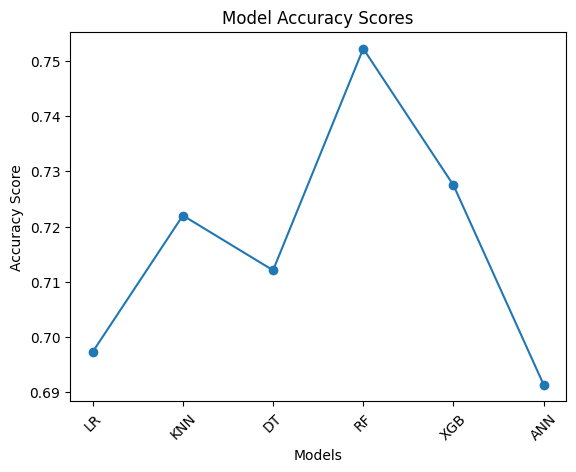

In [ ]:
model_names = ['LR', 'KNN', 'DT', 'RF', 'XGB', 'ANN']
accuracy_scores = [accuracy_score(y_test, pred), accuracy_score(y_test, knn_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, xgb_pred), accuracy_score(y_test, ann_pred)]
plt.plot(model_names, accuracy_scores, marker='o')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Scores')
plt.show()

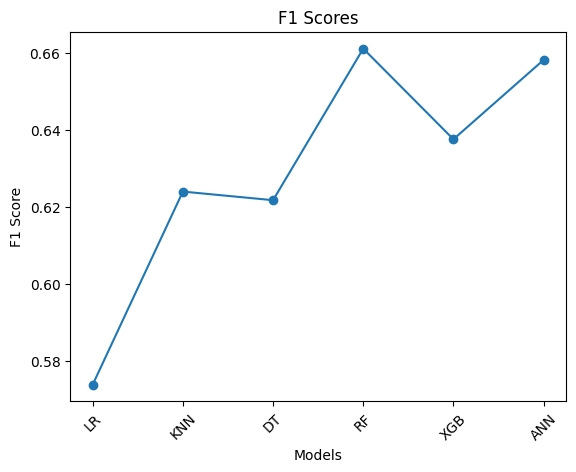

In [ ]:
model_names = ['LR', 'KNN', 'DT', 'RF', 'XGB', 'ANN']
f1_scores = [f1_score(y_test, pred), f1_score(y_test, knn_pred), f1_score(y_test, dt_pred), f1_score(y_test, rf_pred), f1_score(y_test, xgb_pred), f1_score(y_test, ann_pred)]
plt.plot(model_names, f1_scores, marker='o')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.ylabel('F1 Score')
plt.title('F1 Scores')
plt.show()